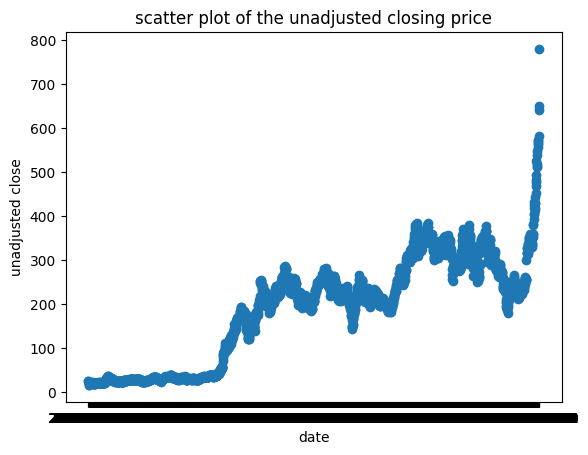

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tesla=pd.read_csv("TSLA.csv")
x_data=tesla["Date"]
close=tesla["Close"]
adj_close=tesla["Adj Close"]

#scatter plot of the data

plt.scatter(x_data, close)
plt.xlabel("date")
plt.ylabel("unadjusted close")
plt.title("scatter plot of the unadjusted closing price")
#plt.grid(True)
#plt.tight_layout()
plt.show()


Text(0, 0.5, 'Adjusted closing price')

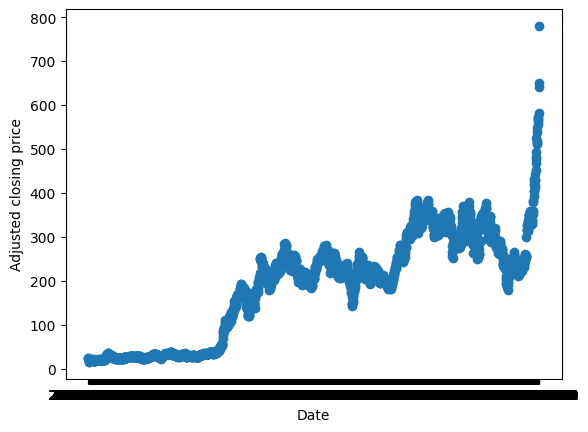

In [6]:
plt.scatter(x_data,adj_close)
plt.xlabel("Date")
plt.ylabel("Adjusted closing price")

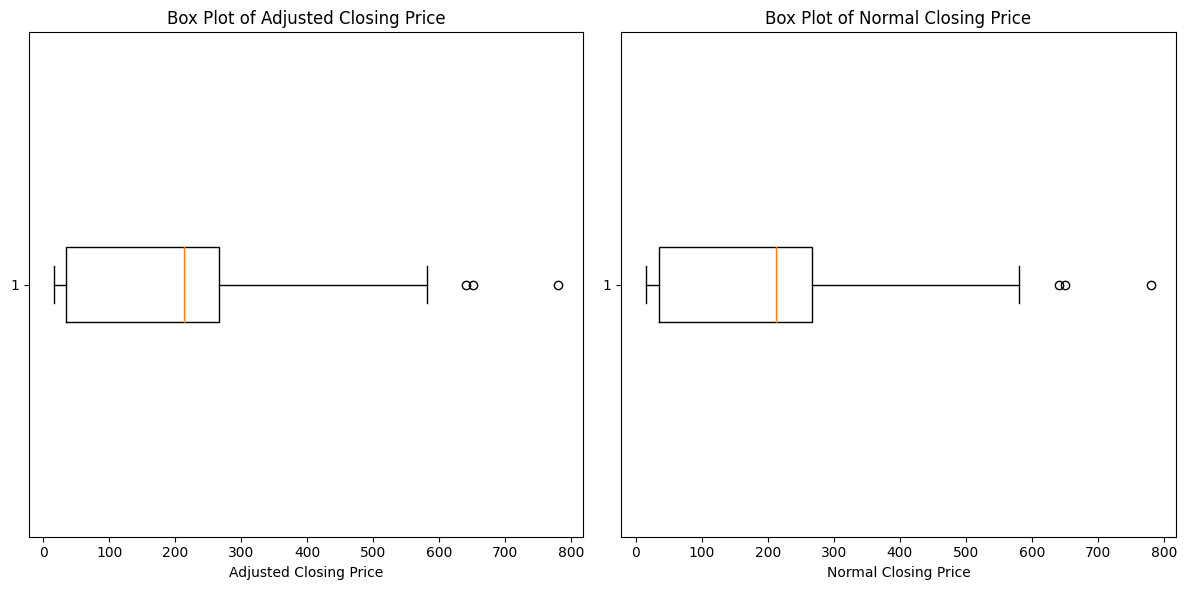

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the box plot for the adjusted closing price
ax1.boxplot(adj_close, vert=False)
ax1.set_xlabel('Adjusted Closing Price')
ax1.set_title('Box Plot of Adjusted Closing Price')

# Plot the box plot for the normal closing price
ax2.boxplot(close, vert=False)
ax2.set_xlabel('Normal Closing Price')
ax2.set_title('Box Plot of Normal Closing Price')

plt.tight_layout()  # Adjust layout for better presentation
plt.show()

In [8]:
window=10
ema=adj_close.ewm(span=window, adjust=False).mean()

ema_df=pd.DataFrame({"date":x_data, "adjusted_closing":adj_close, "EMA":ema})
print(ema_df.head(50))

          date  adjusted_closing        EMA
0   2010-06-29         23.889999  23.889999
1   2010-06-30         23.830000  23.879090
2   2010-07-01         21.959999  23.530164
3   2010-07-02         19.200001  22.742862
4   2010-07-06         16.110001  21.536887
5   2010-07-07         15.800000  20.493817
6   2010-07-08         17.459999  19.942214
7   2010-07-09         17.400000  19.479993
8   2010-07-12         17.049999  19.038176
9   2010-07-13         18.139999  18.874871
10  2010-07-14         19.840000  19.050349
11  2010-07-15         19.889999  19.203013
12  2010-07-16         20.639999  19.464283
13  2010-07-19         21.910000  19.908959
14  2010-07-20         20.299999  19.980057
15  2010-07-21         20.219999  20.023683
16  2010-07-22         21.000000  20.201195
17  2010-07-23         21.290001  20.399160
18  2010-07-26         20.950001  20.499313
19  2010-07-27         20.549999  20.508528
20  2010-07-28         20.719999  20.546978
21  2010-07-29         20.350000

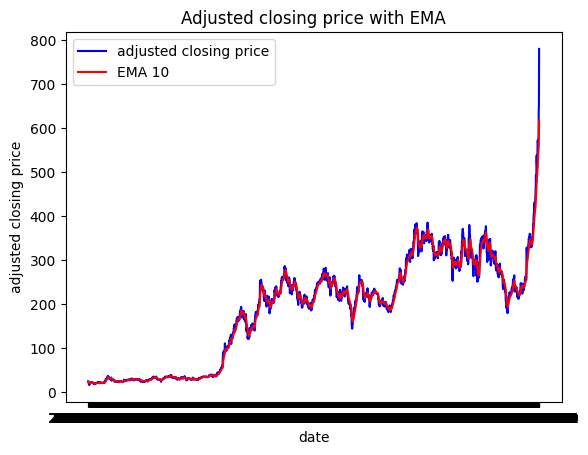

In [9]:
"""plotting the closing data and the ema of the data"""
plt.plot(x_data, adj_close, label="adjusted closing price", color="blue")

plt.plot(x_data, ema, label=f"EMA {window}", color="red")

plt.xlabel("date")
plt.ylabel("adjusted closing price")
plt.legend()
plt.title("Adjusted closing price with EMA")
plt.show()


In [10]:
"""
splitting the data into testing and training data
80 percent of tthe data will be used for training and remaining 20% for testing the model
"""
from sklearn.model_selection import train_test_split as tt
train_data, test_data=tt(ema_df, test_size=0.2, random_state=42)
#the random state is used for the reporducability of the stream
#printing the shape of trianing and testing data
print("train data shape:", train_data.shape)
print("test data shape:", test_data.shape)

train data shape: (1932, 3)
test data shape: (484, 3)


In [11]:
print("train data", train_data)
print(".....................","\n")
print("test data", test_data)


train data             date  adjusted_closing         EMA
1666  2017-02-09        269.200012  256.655755
1563  2016-09-13        196.050003  202.022095
544   2012-08-23         30.730000   29.808931
1025  2014-07-25        223.570007  221.898476
821   2013-10-02        180.949997  184.156190
...          ...               ...         ...
1638  2016-12-29        214.679993  210.173217
1095  2014-11-03        242.589996  237.796932
1130  2014-12-23        220.970001  216.684300
1294  2015-08-19        255.250000  251.714199
860   2013-11-26        120.500000  127.331678

[1932 rows x 3 columns]
..................... 

test data             date  adjusted_closing         EMA
410   2012-02-13         31.490000   30.968199
199   2011-04-12         24.650000   25.537622
1670  2017-02-15        279.760010  268.641526
1934  2018-03-06        328.200012  336.617499
1036  2014-08-11        259.320007  242.571091
...          ...               ...         ...
1423  2016-02-24        179.000000  1

In [12]:
train_describe=train_data[["adjusted_closing", "EMA"]].describe()
test_describe=test_data[["adjusted_closing", "EMA"]].describe()

print("training data describe")
print(train_describe)
print(" \n testing data describe")
print(test_describe)

training data describe
       adjusted_closing          EMA
count       1932.000000  1932.000000
mean         186.340109   185.259299
std          118.078950   116.512740
min           15.800000    18.874871
25%           34.527499    34.225726
50%          212.950004   213.553426
75%          266.167503   266.794329
max          780.000000   617.944025
 
 testing data describe
       adjusted_closing         EMA
count        484.000000  484.000000
mean         186.657294  185.448372
std          123.390392  120.752409
min           19.030001   19.528431
25%           33.802501   33.782509
50%          212.995003  217.684763
75%          270.432495  272.287735
max          640.809998  566.678603


In [13]:
#training the model using linear regression
from sklearn.linear_model import LinearRegression
x_train=np.array(train_data["EMA"]).reshape(-1,1)
y_train=np.array(train_data["adjusted_closing"])

#creating a training model using linear regression
model=LinearRegression()
model.fit(x_train, y_train)
print("model coefficient", model.coef_)
print("intercept", model.intercept_)

model coefficient [1.00982534]
intercept -0.7394262908846088


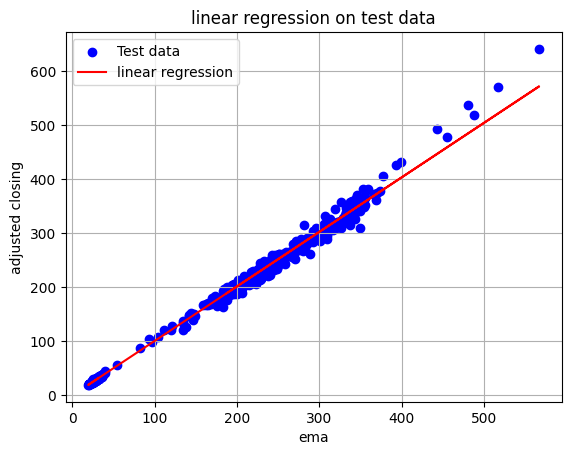

In [14]:
x_test=np.array(test_data["EMA"]).reshape(-1,1)
y_test=np.array(test_data["adjusted_closing"])

#predict the data
y_test_pred=model.predict(x_test)

plt.scatter(x_test, y_test,  label="Test data", color="blue")
plt.plot(x_test, y_test_pred, label="linear regression", color="red")
plt.xlabel("ema")
plt.ylabel("adjusted closing")
plt.title("linear regression on test data")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
def mean_absolute_error(model, x_test, y_test):
    y_pred=model.predict(x_test)
    mae=np.mean(np.abs(y_test-y_pred))
    return mae

def r2error(model, x_test, y_test):
    y_mean=np.mean(y_test)
    y_pred=model.predict(x_test)
    r2=1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-y_mean)**2))
    return r2

mean_abs_error=mean_absolute_error(model,x_test, y_test)
r_squared_error=r2error(model,x_test, y_test)

print("mean squared error", mean_abs_error)
print(" \n R-squared error:", r_squared_error)


mean squared error 5.900673048821038
 
 R-squared error: 0.9938877754074666


In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3, include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
poly_model=LinearRegression()
poly_model

LinearRegression()

In [38]:
poly_model.fit(x_train_poly, y_train)
y_predicted=poly_model.predict(x_test_poly)
y_predicted

array([ 31.42364517,  25.50795275, 268.3517037 , 337.92870641,
       242.6613026 , 360.77254794,  28.1415701 , 216.04393609,
       227.73155831, 281.12100203,  34.60502662, 354.03157071,
        29.13616019, 399.5230407 , 351.5989682 ,  32.90770802,
       206.89918129, 227.65355095, 372.14107039, 100.58969867,
       311.13878242, 292.01188983, 226.45470921,  22.59978268,
       362.24115641,  30.21325981,  27.93886789, 219.61099943,
       249.06475971, 220.81312313, 269.97154814,  20.23007323,
       256.86642504, 224.51105959, 634.61783915, 219.20336998,
       225.33398281, 226.37133185, 308.87390564,  34.49096086,
       151.66176344, 228.78687136, 323.44961079,  23.88849962,
       225.84294317, 294.87544826,  31.23801935, 144.92787949,
       222.19722194,  38.63018157, 224.94329693,  34.60372735,
        37.37712927, 351.88048952, 205.52305949,  37.69503088,
        34.78059016, 240.86598792, 229.07822803,  29.76804783,
       309.29858318, 146.80080679,  32.68091332, 333.87

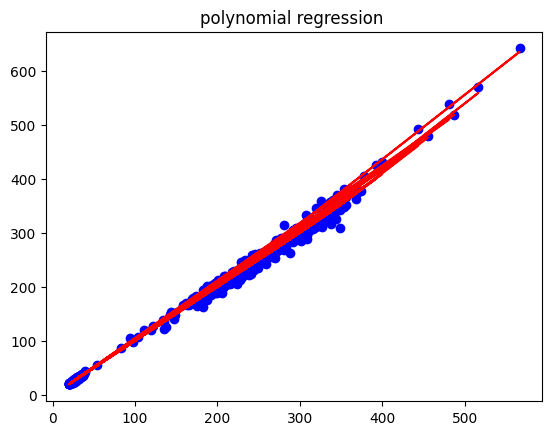

In [39]:
plt.plot(x_test, y_predicted, color="red")
plt.title("polynomial regression ")
plt.scatter(x_test, y_test, color="blue")
plt.show()